In [1]:
%matplotlib ipympl
%load_ext autoreload
%autoreload 2

In [2]:
import cvxpy as cp
from gcspy import GraphOfConvexPrograms

In [3]:
# initialize graph
graph = GraphOfConvexPrograms()

# add vertices on a 2d grid
grid_side = 3 # number of vertices per side of the grid
radius = .3 # radius of the convex sets
for i in range(grid_side):
    for j in range(grid_side):
        center = (i, j) # center of the convex set
        vertex = graph.add_vertex(center) # vertex named as its center
        x = vertex.add_variable(2) # vertex variable
        vertex.add_constraint(cp.norm2(x - center) <= radius) # vertex constraint

In [4]:
# each edge connects two vertices with the following coordinates
tail_names = [(0, 0), (0, 1), (0, 1), (1, 0), (1, 1), (1, 1), (1, 1), (1, 2), (1, 2), (2, 0), (2, 1), (2, 1)]
head_names = [(1, 0), (0, 0), (0, 2), (2, 0), (1, 0), (0, 1), (1, 2), (0, 2), (2, 2), (2, 1), (1, 1), (2, 2)]

# add all the edges to the graph
for tail_name, head_name in zip(tail_names, head_names):
    tail = graph.get_vertex(tail_name)
    head = graph.get_vertex(head_name)
    edge = graph.add_edge(tail, head)
    x_tail = tail.variables[0]
    x_head = head.variables[0]
    edge.add_cost(cp.norm2(x_head - x_tail))

In [5]:
# define source and target of shortest path problem
source = graph.get_vertex((0, 0))
target = graph.get_vertex((0, 2))

# solve shortest path problem and print result
prob = graph.solve_shortest_path(source, target)
print('Problem status:', prob.status)
print('Optimal value:', prob.value)

Problem status: optimal
Optimal value: 4.006844323021004


In [7]:
for vertex in graph.vertices:
    print(vertex.binary_value)

None
None
None
None
None
None
None
None
None


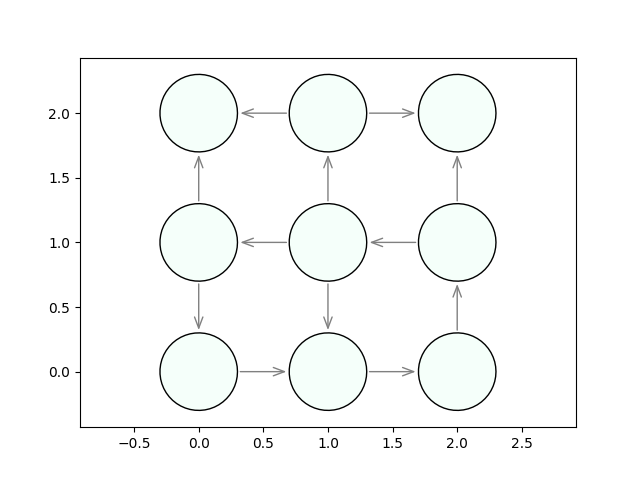

In [6]:
# plot result
import matplotlib.pyplot as plt
plt.figure()
plt.axis("equal")
graph.plot_2d()
graph.plot_2d_subgraph()